In [1]:
import numpy as np
import pandas as pd
import pdb
import torch
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
from natsort import natsorted
import seaborn as sns

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [2]:
# path = 'data/aqx_p_13_2020-10/aqx_p_13_2020-10-01.csv'
root= 'data'

all_path = []

all_months = []
for each_month in os.listdir(root):
    all_months.append(each_month)
    
all_months = natsorted(all_months)

for each_month in all_months:
    all_days = []
    month_path = os.path.join(root, each_month)
    for each_day in os.listdir(month_path):
        all_days.append(each_day)
        
    all_days = natsorted(all_days)
    for each_day in all_days:
        day_path = os.path.join(month_path, each_day)
        
        print(day_path)
        all_path.append(day_path)

data/aqx_p_13_2020-01/aqx_p_13_2020-01-01.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-02.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-03.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-04.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-05.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-06.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-07.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-08.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-09.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-10.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-11.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-12.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-13.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-14.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-15.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-16.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-17.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-18.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-19.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-20.csv
data/aqx_p_13_2020-01/aqx_p_13_2020-01-21.csv
data/aqx_p_13_2020-01/aqx_p_13_202

In [5]:
df = pd.read_csv(all_path[0])

df = df.drop(columns=['SiteName', 'ItemName', 'ItemUnit', 'ItemEngName', 'MonitorDate'])
pm10 = df[df['ItemId']== 33].drop(columns=['ItemId']) #pm10id = 4; pm2.5 = 33
pm10 = pm10.set_index('SiteId')
pm10.shape

(77, 24)

In [6]:
# df = pd.read_csv(all_path[0])

for i in range (len(all_path)):
    tmp = pd.read_csv(all_path[i])
    tmp = tmp.drop(columns=['SiteName', 'ItemName', 'ItemUnit', 'ItemEngName', 'MonitorDate'])
    tmp = tmp[tmp['ItemId']== 4].drop(columns=['ItemId']) #pm10id = 4
    tmp = tmp.set_index('SiteId')
    tmp = tmp.add_prefix(str(i) + '_')
    
    pm10 = pm10.join(tmp)
    print(pm10.shape)


(77, 48)
(77, 72)
(77, 96)
(77, 120)
(77, 144)
(77, 168)
(77, 192)
(77, 216)
(77, 240)
(77, 264)
(77, 288)
(77, 312)
(77, 336)
(77, 360)
(77, 384)
(77, 408)
(77, 432)
(77, 456)
(77, 480)
(77, 504)
(77, 528)
(77, 552)
(77, 576)
(77, 600)
(77, 624)
(77, 648)
(77, 672)
(77, 696)
(77, 720)
(77, 744)
(77, 768)
(77, 792)
(77, 816)
(77, 840)
(77, 864)
(77, 888)
(77, 912)
(77, 936)
(77, 960)
(77, 984)
(77, 1008)
(77, 1032)
(77, 1056)
(77, 1080)
(77, 1104)
(77, 1128)
(77, 1152)
(77, 1176)
(77, 1200)
(77, 1224)
(77, 1248)
(77, 1272)
(77, 1296)
(77, 1320)
(77, 1344)
(77, 1368)
(77, 1392)
(77, 1416)
(77, 1440)
(77, 1464)
(77, 1488)
(77, 1512)
(77, 1536)
(77, 1560)
(77, 1584)
(77, 1608)
(77, 1632)
(77, 1656)
(77, 1680)
(77, 1704)
(77, 1728)
(77, 1752)
(77, 1776)
(77, 1800)
(77, 1824)
(77, 1848)
(77, 1872)
(77, 1896)
(77, 1920)
(77, 1944)
(77, 1968)
(77, 1992)
(77, 2016)
(77, 2040)
(77, 2064)
(77, 2088)
(77, 2112)
(77, 2136)
(77, 2160)
(77, 2184)
(77, 2208)
(77, 2232)
(77, 2256)
(77, 2280)
(77, 2304

In [7]:
# check nas
pm10.isnull().values.any() # True
# fill nas
# new_pm10 = pm10.fillna(method = 'ffill', inplace=True)
pm10 = pm10.fillna(0)
pm10.shape

pm10 = pm10.replace('x',0)
pm10 = pm10.astype(float)

# heatmap

In [ ]:
corr = pm10.T.corr()
#print(corr)

# mask lower triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.color_palette("coolwarm", 5)

# print(mask[0])
# Set up the matplotlib figure
f = plt.figure(figsize=(18, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap)

# cleaning and preproces

In [8]:
np_pm10 = np.array(pm10) 

# check Xs
if 'x' in np_pm10:  
    print('np_y:')
    print(True)

# fill Xs
np_y_new = np.where(np_pm10 == 'x', 0, np_pm10)
timelen = np_pm10.shape[1] # (77測站, 8604 time series)
inputlen = 100

for i in range(timelen-inputlen):
    if i == 0:
        data = np_pm10.T[i:100+i].T 
    tmp = np_pm10.T[i:100+i].T
    data = np.concatenate((data,tmp))
    print(data.shape)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


(154, 100)
(231, 100)
(308, 100)
(385, 100)
(462, 100)
(539, 100)
(616, 100)
(693, 100)
(770, 100)
(847, 100)
(924, 100)
(1001, 100)
(1078, 100)
(1155, 100)
(1232, 100)
(1309, 100)
(1386, 100)
(1463, 100)
(1540, 100)
(1617, 100)
(1694, 100)
(1771, 100)
(1848, 100)
(1925, 100)
(2002, 100)
(2079, 100)
(2156, 100)
(2233, 100)
(2310, 100)
(2387, 100)
(2464, 100)
(2541, 100)
(2618, 100)
(2695, 100)
(2772, 100)
(2849, 100)
(2926, 100)
(3003, 100)
(3080, 100)
(3157, 100)
(3234, 100)
(3311, 100)
(3388, 100)
(3465, 100)
(3542, 100)
(3619, 100)
(3696, 100)
(3773, 100)
(3850, 100)
(3927, 100)
(4004, 100)
(4081, 100)
(4158, 100)
(4235, 100)
(4312, 100)
(4389, 100)
(4466, 100)
(4543, 100)
(4620, 100)
(4697, 100)
(4774, 100)
(4851, 100)
(4928, 100)
(5005, 100)
(5082, 100)
(5159, 100)
(5236, 100)
(5313, 100)
(5390, 100)
(5467, 100)
(5544, 100)
(5621, 100)
(5698, 100)
(5775, 100)
(5852, 100)
(5929, 100)
(6006, 100)
(6083, 100)
(6160, 100)
(6237, 100)
(6314, 100)
(6391, 100)
(6468, 100)
(6545, 100)
(66

(51051, 100)
(51128, 100)
(51205, 100)
(51282, 100)
(51359, 100)
(51436, 100)
(51513, 100)
(51590, 100)
(51667, 100)
(51744, 100)
(51821, 100)
(51898, 100)
(51975, 100)
(52052, 100)
(52129, 100)
(52206, 100)
(52283, 100)
(52360, 100)
(52437, 100)
(52514, 100)
(52591, 100)
(52668, 100)
(52745, 100)
(52822, 100)
(52899, 100)
(52976, 100)
(53053, 100)
(53130, 100)
(53207, 100)
(53284, 100)
(53361, 100)
(53438, 100)
(53515, 100)
(53592, 100)
(53669, 100)
(53746, 100)
(53823, 100)
(53900, 100)
(53977, 100)
(54054, 100)
(54131, 100)
(54208, 100)
(54285, 100)
(54362, 100)
(54439, 100)
(54516, 100)
(54593, 100)
(54670, 100)
(54747, 100)
(54824, 100)
(54901, 100)
(54978, 100)
(55055, 100)
(55132, 100)
(55209, 100)
(55286, 100)
(55363, 100)
(55440, 100)
(55517, 100)
(55594, 100)
(55671, 100)
(55748, 100)
(55825, 100)
(55902, 100)
(55979, 100)
(56056, 100)
(56133, 100)
(56210, 100)
(56287, 100)
(56364, 100)
(56441, 100)
(56518, 100)
(56595, 100)
(56672, 100)
(56749, 100)
(56826, 100)
(56903, 100)

(100947, 100)
(101024, 100)
(101101, 100)
(101178, 100)
(101255, 100)
(101332, 100)
(101409, 100)
(101486, 100)
(101563, 100)
(101640, 100)
(101717, 100)
(101794, 100)
(101871, 100)
(101948, 100)
(102025, 100)
(102102, 100)
(102179, 100)
(102256, 100)
(102333, 100)
(102410, 100)
(102487, 100)
(102564, 100)
(102641, 100)
(102718, 100)
(102795, 100)
(102872, 100)
(102949, 100)
(103026, 100)
(103103, 100)
(103180, 100)
(103257, 100)
(103334, 100)
(103411, 100)
(103488, 100)
(103565, 100)
(103642, 100)
(103719, 100)
(103796, 100)
(103873, 100)
(103950, 100)
(104027, 100)
(104104, 100)
(104181, 100)
(104258, 100)
(104335, 100)
(104412, 100)
(104489, 100)
(104566, 100)
(104643, 100)
(104720, 100)
(104797, 100)
(104874, 100)
(104951, 100)
(105028, 100)
(105105, 100)
(105182, 100)
(105259, 100)
(105336, 100)
(105413, 100)
(105490, 100)
(105567, 100)
(105644, 100)
(105721, 100)
(105798, 100)
(105875, 100)
(105952, 100)
(106029, 100)
(106106, 100)
(106183, 100)
(106260, 100)
(106337, 100)
(10641

(146146, 100)
(146223, 100)
(146300, 100)
(146377, 100)
(146454, 100)
(146531, 100)
(146608, 100)
(146685, 100)
(146762, 100)
(146839, 100)
(146916, 100)
(146993, 100)
(147070, 100)
(147147, 100)
(147224, 100)
(147301, 100)
(147378, 100)
(147455, 100)
(147532, 100)
(147609, 100)
(147686, 100)
(147763, 100)
(147840, 100)
(147917, 100)
(147994, 100)
(148071, 100)
(148148, 100)
(148225, 100)
(148302, 100)
(148379, 100)
(148456, 100)
(148533, 100)
(148610, 100)
(148687, 100)
(148764, 100)
(148841, 100)
(148918, 100)
(148995, 100)
(149072, 100)
(149149, 100)
(149226, 100)
(149303, 100)
(149380, 100)
(149457, 100)
(149534, 100)
(149611, 100)
(149688, 100)
(149765, 100)
(149842, 100)
(149919, 100)
(149996, 100)
(150073, 100)
(150150, 100)
(150227, 100)
(150304, 100)
(150381, 100)
(150458, 100)
(150535, 100)
(150612, 100)
(150689, 100)
(150766, 100)
(150843, 100)
(150920, 100)
(150997, 100)
(151074, 100)
(151151, 100)
(151228, 100)
(151305, 100)
(151382, 100)
(151459, 100)
(151536, 100)
(15161

(191807, 100)
(191884, 100)
(191961, 100)
(192038, 100)
(192115, 100)
(192192, 100)
(192269, 100)
(192346, 100)
(192423, 100)
(192500, 100)
(192577, 100)
(192654, 100)
(192731, 100)
(192808, 100)
(192885, 100)
(192962, 100)
(193039, 100)
(193116, 100)
(193193, 100)
(193270, 100)
(193347, 100)
(193424, 100)
(193501, 100)
(193578, 100)
(193655, 100)
(193732, 100)
(193809, 100)
(193886, 100)
(193963, 100)
(194040, 100)
(194117, 100)
(194194, 100)
(194271, 100)
(194348, 100)
(194425, 100)
(194502, 100)
(194579, 100)
(194656, 100)
(194733, 100)
(194810, 100)
(194887, 100)
(194964, 100)
(195041, 100)
(195118, 100)
(195195, 100)
(195272, 100)
(195349, 100)
(195426, 100)
(195503, 100)
(195580, 100)
(195657, 100)
(195734, 100)
(195811, 100)
(195888, 100)
(195965, 100)
(196042, 100)
(196119, 100)
(196196, 100)
(196273, 100)
(196350, 100)
(196427, 100)
(196504, 100)
(196581, 100)
(196658, 100)
(196735, 100)
(196812, 100)
(196889, 100)
(196966, 100)
(197043, 100)
(197120, 100)
(197197, 100)
(19727

(237083, 100)
(237160, 100)
(237237, 100)
(237314, 100)
(237391, 100)
(237468, 100)
(237545, 100)
(237622, 100)
(237699, 100)
(237776, 100)
(237853, 100)
(237930, 100)
(238007, 100)
(238084, 100)
(238161, 100)
(238238, 100)
(238315, 100)
(238392, 100)
(238469, 100)
(238546, 100)
(238623, 100)
(238700, 100)
(238777, 100)
(238854, 100)
(238931, 100)
(239008, 100)
(239085, 100)
(239162, 100)
(239239, 100)
(239316, 100)
(239393, 100)
(239470, 100)
(239547, 100)
(239624, 100)
(239701, 100)
(239778, 100)
(239855, 100)
(239932, 100)
(240009, 100)
(240086, 100)
(240163, 100)
(240240, 100)
(240317, 100)
(240394, 100)
(240471, 100)
(240548, 100)
(240625, 100)
(240702, 100)
(240779, 100)
(240856, 100)
(240933, 100)
(241010, 100)
(241087, 100)
(241164, 100)
(241241, 100)
(241318, 100)
(241395, 100)
(241472, 100)
(241549, 100)
(241626, 100)
(241703, 100)
(241780, 100)
(241857, 100)
(241934, 100)
(242011, 100)
(242088, 100)
(242165, 100)
(242242, 100)
(242319, 100)
(242396, 100)
(242473, 100)
(24255

(282436, 100)
(282513, 100)
(282590, 100)
(282667, 100)
(282744, 100)
(282821, 100)
(282898, 100)
(282975, 100)
(283052, 100)
(283129, 100)
(283206, 100)
(283283, 100)
(283360, 100)
(283437, 100)
(283514, 100)
(283591, 100)
(283668, 100)
(283745, 100)
(283822, 100)
(283899, 100)
(283976, 100)
(284053, 100)
(284130, 100)
(284207, 100)
(284284, 100)
(284361, 100)
(284438, 100)
(284515, 100)
(284592, 100)
(284669, 100)
(284746, 100)
(284823, 100)
(284900, 100)
(284977, 100)
(285054, 100)
(285131, 100)
(285208, 100)
(285285, 100)
(285362, 100)
(285439, 100)
(285516, 100)
(285593, 100)
(285670, 100)
(285747, 100)
(285824, 100)
(285901, 100)
(285978, 100)
(286055, 100)
(286132, 100)
(286209, 100)
(286286, 100)
(286363, 100)
(286440, 100)
(286517, 100)
(286594, 100)
(286671, 100)
(286748, 100)
(286825, 100)
(286902, 100)
(286979, 100)
(287056, 100)
(287133, 100)
(287210, 100)
(287287, 100)
(287364, 100)
(287441, 100)
(287518, 100)
(287595, 100)
(287672, 100)
(287749, 100)
(287826, 100)
(28790

(327712, 100)
(327789, 100)
(327866, 100)
(327943, 100)
(328020, 100)
(328097, 100)
(328174, 100)
(328251, 100)
(328328, 100)
(328405, 100)
(328482, 100)
(328559, 100)
(328636, 100)
(328713, 100)
(328790, 100)
(328867, 100)
(328944, 100)
(329021, 100)
(329098, 100)
(329175, 100)
(329252, 100)
(329329, 100)
(329406, 100)
(329483, 100)
(329560, 100)
(329637, 100)
(329714, 100)
(329791, 100)
(329868, 100)
(329945, 100)
(330022, 100)
(330099, 100)
(330176, 100)
(330253, 100)
(330330, 100)
(330407, 100)
(330484, 100)
(330561, 100)
(330638, 100)
(330715, 100)
(330792, 100)
(330869, 100)
(330946, 100)
(331023, 100)
(331100, 100)
(331177, 100)
(331254, 100)
(331331, 100)
(331408, 100)
(331485, 100)
(331562, 100)
(331639, 100)
(331716, 100)
(331793, 100)
(331870, 100)
(331947, 100)
(332024, 100)
(332101, 100)
(332178, 100)
(332255, 100)
(332332, 100)
(332409, 100)
(332486, 100)
(332563, 100)
(332640, 100)
(332717, 100)
(332794, 100)
(332871, 100)
(332948, 100)
(333025, 100)
(333102, 100)
(33317

(372988, 100)
(373065, 100)
(373142, 100)
(373219, 100)
(373296, 100)
(373373, 100)
(373450, 100)
(373527, 100)
(373604, 100)
(373681, 100)
(373758, 100)
(373835, 100)
(373912, 100)
(373989, 100)
(374066, 100)
(374143, 100)
(374220, 100)
(374297, 100)
(374374, 100)
(374451, 100)
(374528, 100)
(374605, 100)
(374682, 100)
(374759, 100)
(374836, 100)
(374913, 100)
(374990, 100)
(375067, 100)
(375144, 100)
(375221, 100)
(375298, 100)
(375375, 100)
(375452, 100)
(375529, 100)
(375606, 100)
(375683, 100)
(375760, 100)
(375837, 100)
(375914, 100)
(375991, 100)
(376068, 100)
(376145, 100)
(376222, 100)
(376299, 100)
(376376, 100)
(376453, 100)
(376530, 100)
(376607, 100)
(376684, 100)
(376761, 100)
(376838, 100)
(376915, 100)
(376992, 100)
(377069, 100)
(377146, 100)
(377223, 100)
(377300, 100)
(377377, 100)
(377454, 100)
(377531, 100)
(377608, 100)
(377685, 100)
(377762, 100)
(377839, 100)
(377916, 100)
(377993, 100)
(378070, 100)
(378147, 100)
(378224, 100)
(378301, 100)
(378378, 100)
(37845

(418418, 100)
(418495, 100)
(418572, 100)
(418649, 100)
(418726, 100)
(418803, 100)
(418880, 100)
(418957, 100)
(419034, 100)
(419111, 100)
(419188, 100)
(419265, 100)
(419342, 100)
(419419, 100)
(419496, 100)
(419573, 100)
(419650, 100)
(419727, 100)
(419804, 100)
(419881, 100)
(419958, 100)
(420035, 100)
(420112, 100)
(420189, 100)
(420266, 100)
(420343, 100)
(420420, 100)
(420497, 100)
(420574, 100)
(420651, 100)
(420728, 100)
(420805, 100)
(420882, 100)
(420959, 100)
(421036, 100)
(421113, 100)
(421190, 100)
(421267, 100)
(421344, 100)
(421421, 100)
(421498, 100)
(421575, 100)
(421652, 100)
(421729, 100)
(421806, 100)
(421883, 100)
(421960, 100)
(422037, 100)
(422114, 100)
(422191, 100)
(422268, 100)
(422345, 100)
(422422, 100)
(422499, 100)
(422576, 100)
(422653, 100)
(422730, 100)
(422807, 100)
(422884, 100)
(422961, 100)
(423038, 100)
(423115, 100)
(423192, 100)
(423269, 100)
(423346, 100)
(423423, 100)
(423500, 100)
(423577, 100)
(423654, 100)
(423731, 100)
(423808, 100)
(42388

(463694, 100)
(463771, 100)
(463848, 100)
(463925, 100)
(464002, 100)
(464079, 100)
(464156, 100)
(464233, 100)
(464310, 100)
(464387, 100)
(464464, 100)
(464541, 100)
(464618, 100)
(464695, 100)
(464772, 100)
(464849, 100)
(464926, 100)
(465003, 100)
(465080, 100)
(465157, 100)
(465234, 100)
(465311, 100)
(465388, 100)
(465465, 100)
(465542, 100)
(465619, 100)
(465696, 100)
(465773, 100)
(465850, 100)
(465927, 100)
(466004, 100)
(466081, 100)
(466158, 100)
(466235, 100)
(466312, 100)
(466389, 100)
(466466, 100)
(466543, 100)
(466620, 100)
(466697, 100)
(466774, 100)
(466851, 100)
(466928, 100)
(467005, 100)
(467082, 100)
(467159, 100)
(467236, 100)
(467313, 100)
(467390, 100)
(467467, 100)
(467544, 100)
(467621, 100)
(467698, 100)
(467775, 100)
(467852, 100)
(467929, 100)
(468006, 100)
(468083, 100)
(468160, 100)
(468237, 100)
(468314, 100)
(468391, 100)
(468468, 100)
(468545, 100)
(468622, 100)
(468699, 100)
(468776, 100)
(468853, 100)
(468930, 100)
(469007, 100)
(469084, 100)
(46916

(508970, 100)
(509047, 100)
(509124, 100)
(509201, 100)
(509278, 100)
(509355, 100)
(509432, 100)
(509509, 100)
(509586, 100)
(509663, 100)
(509740, 100)
(509817, 100)
(509894, 100)
(509971, 100)
(510048, 100)
(510125, 100)
(510202, 100)
(510279, 100)
(510356, 100)
(510433, 100)
(510510, 100)
(510587, 100)
(510664, 100)
(510741, 100)
(510818, 100)
(510895, 100)
(510972, 100)
(511049, 100)
(511126, 100)
(511203, 100)
(511280, 100)
(511357, 100)
(511434, 100)
(511511, 100)
(511588, 100)
(511665, 100)
(511742, 100)
(511819, 100)
(511896, 100)
(511973, 100)
(512050, 100)
(512127, 100)
(512204, 100)
(512281, 100)
(512358, 100)
(512435, 100)
(512512, 100)
(512589, 100)
(512666, 100)
(512743, 100)
(512820, 100)
(512897, 100)
(512974, 100)
(513051, 100)
(513128, 100)
(513205, 100)
(513282, 100)
(513359, 100)
(513436, 100)
(513513, 100)
(513590, 100)
(513667, 100)
(513744, 100)
(513821, 100)
(513898, 100)
(513975, 100)
(514052, 100)
(514129, 100)
(514206, 100)
(514283, 100)
(514360, 100)
(51443

(554246, 100)
(554323, 100)
(554400, 100)
(554477, 100)
(554554, 100)
(554631, 100)
(554708, 100)
(554785, 100)
(554862, 100)
(554939, 100)
(555016, 100)
(555093, 100)
(555170, 100)
(555247, 100)
(555324, 100)
(555401, 100)
(555478, 100)
(555555, 100)
(555632, 100)
(555709, 100)
(555786, 100)
(555863, 100)
(555940, 100)
(556017, 100)
(556094, 100)
(556171, 100)
(556248, 100)
(556325, 100)
(556402, 100)
(556479, 100)
(556556, 100)
(556633, 100)
(556710, 100)
(556787, 100)
(556864, 100)
(556941, 100)
(557018, 100)
(557095, 100)
(557172, 100)
(557249, 100)
(557326, 100)
(557403, 100)
(557480, 100)
(557557, 100)
(557634, 100)
(557711, 100)
(557788, 100)
(557865, 100)
(557942, 100)
(558019, 100)
(558096, 100)
(558173, 100)
(558250, 100)
(558327, 100)
(558404, 100)
(558481, 100)
(558558, 100)
(558635, 100)
(558712, 100)
(558789, 100)
(558866, 100)
(558943, 100)
(559020, 100)
(559097, 100)
(559174, 100)
(559251, 100)
(559328, 100)
(559405, 100)
(559482, 100)
(559559, 100)
(559636, 100)
(55971

(599368, 100)
(599445, 100)
(599522, 100)
(599599, 100)
(599676, 100)
(599753, 100)
(599830, 100)
(599907, 100)
(599984, 100)
(600061, 100)
(600138, 100)
(600215, 100)
(600292, 100)
(600369, 100)
(600446, 100)
(600523, 100)
(600600, 100)
(600677, 100)
(600754, 100)
(600831, 100)
(600908, 100)
(600985, 100)
(601062, 100)
(601139, 100)
(601216, 100)
(601293, 100)
(601370, 100)
(601447, 100)
(601524, 100)
(601601, 100)
(601678, 100)
(601755, 100)
(601832, 100)
(601909, 100)
(601986, 100)
(602063, 100)
(602140, 100)
(602217, 100)
(602294, 100)
(602371, 100)
(602448, 100)
(602525, 100)
(602602, 100)
(602679, 100)
(602756, 100)
(602833, 100)
(602910, 100)
(602987, 100)
(603064, 100)
(603141, 100)
(603218, 100)
(603295, 100)
(603372, 100)
(603449, 100)
(603526, 100)
(603603, 100)
(603680, 100)
(603757, 100)
(603834, 100)
(603911, 100)
(603988, 100)
(604065, 100)
(604142, 100)
(604219, 100)
(604296, 100)
(604373, 100)
(604450, 100)
(604527, 100)
(604604, 100)
(604681, 100)
(604758, 100)
(60483

In [24]:
datalen = data.shape[0]
split = int(datalen * 0.001)

from sklearn.utils import shuffle
#shuffle data
shuff_data = shuffle(data)

train = shuff_data[split:]
test = shuff_data[:split]
vis_test = data[:split]

print(train.shape)
print(test.shape)
print(vis_test.shape)


x_train = train[:,:99].reshape(-1,99,1)
y_train = train[:,99:]

x_test = vis_test[:,:99].reshape(-1,99,1)
y_test = vis_test[:,99:]

print(x_train.shape)
print(y_train.shape)


(612692, 100)
(613, 100)
(613, 100)
(612692, 99, 1)
(612692, 1)


# Regression

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train[:,:99], y_train)


In [26]:
def RMS(y, t):
    return np.sqrt(np.mean((y - t) ** 2)) 

In [30]:
print(reg.score(train[:,:99], y_train))
print(reg.coef_)
print(reg.intercept_)
print(RMS(reg.predict(test[:,:99]),y_test))

0.8157084824867795
[[-8.45047765e-03 -8.28943545e-03 -5.66586184e-03  1.95123444e-02
   9.90204450e-03  7.13221002e-03  2.90858367e-03  3.54439646e-03
  -2.89237580e-04 -4.69441835e-03  3.82776951e-03 -3.58569452e-03
   1.90274589e-03  1.80186810e-04  6.45254889e-05  1.17758812e-03
  -1.65315184e-03  1.05729986e-03 -2.13377906e-03 -8.10669732e-04
   4.25990519e-03 -2.32323643e-03 -1.10844084e-03 -4.14054462e-03
  -1.04323039e-02 -2.50055545e-03 -6.71417296e-03  1.76124282e-02
   1.29085764e-02  8.04348945e-03  2.69038305e-03  3.60481331e-03
  -9.52379405e-05 -4.51826262e-03  1.19154839e-03  1.42759469e-03
  -3.14407051e-03  2.56849235e-03 -2.15116139e-03 -2.14507217e-03
  -4.18067146e-03  1.64558025e-03  1.66205955e-03 -3.28714209e-03
   2.56361492e-03 -1.13675219e-04 -3.78331957e-03 -2.95007461e-03
  -4.79424190e-03 -6.06229557e-03 -8.37777247e-03  2.19001823e-02
   8.80338504e-03  6.32105954e-03  5.88693846e-03 -2.69085425e-03
  -1.77921157e-03 -1.49386414e-03  3.42797582e-05  3.9829

In [28]:
y_test.shape

(613, 1)

Text(0.5, 1.0, 'prediction vs test values')

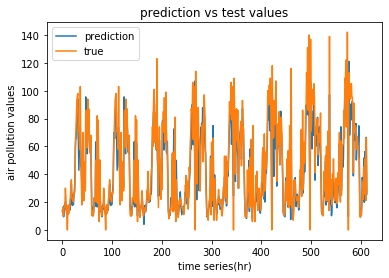

In [31]:
pred = reg.predict(vis_test[:,:99])
plt.plot(pred, label = 'prediction')
plt.plot(y_test, label = 'true')
plt.legend(loc='best')
plt.xlabel('time series(hr)')
plt.ylabel('air pollution values')

plt.title('prediction vs test values')

# LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU

model = Sequential()
#LSTM
model.add(
        LSTM(
                10,
                input_shape = (99,1),
                return_sequences = False
                )
        )
##GRU
#model.add(
#        GRU(
#                10,
#                input_shape = (100,1),
#                return_sequences = False
#                )
#        )
#        

#neural output
model.add(Dense(1,activation='tanh'))
model.summary()

#%%
# model compile

model.compile(loss='mse', #categorical
              optimizer='adam')



#%%
#training
train_history = model.fit(
        x_train,
        y_train,
        validation_split=0.2, #將training 切出 validation set 
        batch_size = 100, #每次訓練幾筆資料再更新
        epochs = 3, # 要反覆訓練幾次，1次＝跑完所有（data-validation)
        )



In [ ]:
#%%
#plot

plt.plot(train_history.history['loss'])
# plt.plot(train_history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
plt.close()

#%%
#predict

pred = model.predict(x_test)
plt.plot(pred, label = 'prediction')
plt.plot(y_test, label = 'true')
plt.legend(loc='upper right')